# Assignment 2

## Printed copy due in class on October 15, 2018

You may work in pairs on this assignment. You are not permitted to discuss this assignment with anyone other than your partner or the instructors.

## Student 1:
## Student 2:

## Question 1: Maximum Likelihood

The Weibull distribution is widely used to model failure times. Its p.d.f. is 

$$ p(x) = \frac{\beta}{\alpha} \left( \frac{x}{\alpha} \right)^{\beta - 1} e^{-\left(\frac{x}{\alpha}\right)^\beta}. $$

The data in `/data400/test_coupons_failure.csv` contain the cycles to failure of aluminum test coupons subjected to repeated alternating stress of 15,000 psi at 20 cycles per second. In this question, you will use the Weibull distribution to model this data.

For some parts, you will be able to calculate the maximum likelihood analytically (i.e., by taking the derivative and setting it equal to 0). You should show your work in this case. (I encourage you to typeset math equations using LaTeX. The p.d.f. above was typeset using LaTeX, for example.) For others, you will calculate the maximum likelihood numerically. You should show your code in this case.

In [2]:
import numpy as np
import pandas as pd
cycles = pd.read_csv("/data400/test_coupons_failure.csv")["cycles"]
cycles

def weibull_neg_log_likelihood(alpha, beta):
    x = cycles.copy()
    n = len(cycles)
    return -(
        n * (np.log(beta) - np.log(alpha)) +
        (beta - 1) * np.sum(np.log(x / alpha)) -
        np.sum((x / alpha) ** beta)
    )

### Part A. Unknown $\alpha$

Suppose you want to model the distribution by a Weibull where $\beta=2.0$. Find the maximum likelihood estimate (MLE) of $\alpha$.

In [7]:
# YOUR WORK HERE
from scipy.optimize import minimize

mle_a = minimize(
    lambda alpha: weibull_neg_log_likelihood(alpha, beta=2.0),
    x0=[1]
).x

### Part B. Unknown $\beta$

Suppose you want to model the distribution by a Weibull where $\alpha=8000$. Find the MLE of $\beta$.

In [11]:
# YOUR WORK HERE
mle_b = minimize(
    lambda beta: weibull_neg_log_likelihood(8000, beta),
    x0=[1]
).x

### Part C. Unknown $\alpha$ and $\beta$

Suppose you are unsure what either $\alpha$ or $\beta$ should be, so you would like to learn both parameters from data. Find the MLE of $(\alpha, \beta)$.

In [14]:
# YOUR WORK HERE
mle_c = minimize(
    lambda params: weibull_neg_log_likelihood(*params),
    x0=[8000, 2]
).x

### Part D. Plot your results

Make a histogram of the coupon cycles data. You learned three different Weibull distributions in Parts A-C above. Show the p.d.f.s of these three distributions on top of the histograms. Which p.d.f. seems to fit the data the best?

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

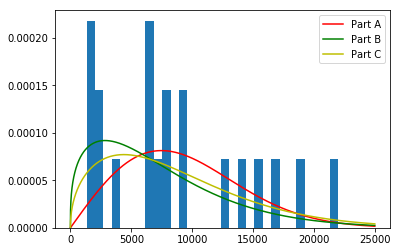

In [25]:
# YOUR WORK HERE
def weibull_pdf(x, alpha, beta):
    return (beta / alpha) * ((x / alpha) ** (beta - 1)) * np.exp(-(x / alpha) ** beta)

plt.hist(cycles, bins=30, density=True);
xs = np.arange(25000)

# PART A
ps = [weibull_pdf(x, mle_a[0], 2.0) for x in xs]
plt.plot(xs, ps, 'r-')

# PART B
ps = [weibull_pdf(x, 8000, mle_b[0]) for x in xs]
plt.plot(xs, ps, 'g-')

# PART C
ps = [weibull_pdf(x, mle_c[0], mle_c[1]) for x in xs]
plt.plot(xs, ps, 'y-')

plt.legend(["Part A", "Part B", "Part C"])

## Question 2: Simple Linear Regression with Intercept

In this class, you will explore the simple linear regression model (with intercept). That is, we assume that the labels $Y_i$ are independently generated according to 
$$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i,$$

where the feature $x_i$ is assumed to be fixed and $\epsilon_i$ is $\textrm{Normal}(0, \sigma^2)$. 

In other words, we assume that the distribution of $Y_i$ is $\text{Normal}(\beta_0 + \beta_1 x_i, \sigma^2)$, and $Y_1, ..., Y_n$ are independent (but not identically distributed).

### Part A. Deriving the MLE from Scratch

Use calculus to find $\hat\beta_0$, $\hat\beta_1$, and $\hat\sigma^2$ (the MLEs of $\beta_0$, $\beta_1$, and $\sigma^2$) in terms of $(x_1, Y_1), ..., (x_n, Y_n)$.

In [ ]:
# YOUR WORK HERE

### Part B. Deriving the MLE from the Multiple Regression Formula

In class, we showed that for multiple linear regression, the _vector_ $\hat\beta$ of estimated coefficients is given by the formula
$$\hat\beta = (X^T X)^{-1} X^T {\bf y},$$
where $X$ is an $n \times d$ matrix of features and ${\bf y}$ is a length-$n$ vector of labels.

By constructing a suitable matrix $X$ for simple linear regression, re-derive the simple linear regression estimates $\hat\beta_0$ and $\hat\beta_1$ using the multiple regression formula above.

In [ ]:
# YOUR WORK HERE

## Submission Instructions

Once you are finished with this assignment, please export this notebook to PDF. You can do this by going to `File > Export Notebook As > PDF`. If this does not work, try exporting to HTML and then printing the resulting webpage to PDF. Print out the PDF and submit a paper copy of this assignment.